In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

### 특성공학 / 규제

데이터 준비

In [23]:
df =pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

#### 농어데이터
농어의 길이, 높이, 두께 --> 농어의 무게를 예측
무게데이터

In [24]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

####  훈련세트/데이터세트 나누기

In [25]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 사이킷런 변환기

특성이 하나 이상일때 하나의 특성(새 회귀방정식) 만드는 것

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])
poly.get_feature_names()

c:\Users\admin\anaconda3\envs\django-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어데이터 3개의 특징
트랜스포머로 특징을 분리

In [31]:
from turtle import shape

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
train_poly = poly.transform(train_input)
print(train_poly,shape)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [32]:
poly.get_feature_names()

c:\Users\admin\anaconda3\envs\django-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [33]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

#### 다중 회귀모델 훈련

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)
lr.score(X=train_poly, y=train_target)

0.9903183436982124

In [36]:
lr.score(X=test_poly, y=test_target)

0.9714559911594145

### 예측하기 위한 데이터도 변환

In [43]:
pred_x=[[50. ,13.5, 9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
pred_poly = poly.transform(pred_x)
print(pred_poly,shape)

[[  50.     13.5     9.2  2500.    675.    460.    182.25  124.2    84.64]] <function shape at 0x0000020CAB5F5FC0>


In [44]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [47]:
# 9개의 특성으로 예측해야 함
lr.predict(X=pred_poly)

array([1634.45893639])

#### 추가적인 내용

In [48]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [49]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999996176

#### 표준화작업

(입력값-평균) / 표준편차  일정한 단위가 되도록

In [50]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [51]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [52]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [53]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

###  규제

훈련세트에 치중해서 과대적합이 되지 않도록 해주는 작업  -->릿지모델 / 라쏘모델

#### 릿지모델

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target) # fit은 훈련 시키는 것
print(ridge.score(train_scaled, train_target)) # score은 결정계수를 보여주는 함수

0.9896101671037343


In [55]:
ridge.score(X=test_scaled, y=test_target)

0.9790693977615383

#### 하이퍼파라미터 alpha값 찾기

In [65]:
import matplotlib.pyplot as plt

train_score  = []
train_score2  = []
test_score = []

In [66]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: #여섯번 훈련
    ridge = Ridge(alpha=alpha) # alpha값을 변경하면서 생성 6번
    ridge.fit(X=train_scaled, y=train_target)

    train_score2.append(ridge.score(X=train_scaled, y=train_target))
    test_score.append(ridge.score(X=test_scaled, y=test_target))


In [67]:
train_score2

[0.9930455252088513,
 0.9917809981250514,
 0.9903815817570366,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

In [62]:
test_score

[0.9569388961546104,
 0.9800187936870526,
 0.9827976465386937,
 0.9790693977615383,
 0.9725329582461569,
 0.9627042641050291]

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

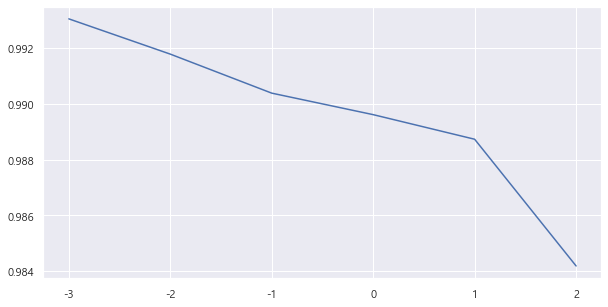

In [71]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score2)
plt.plot(np.log10(alpha_list), test_score)
plt.show()


In [70]:
# alpha값은 -1 = 0.1이 되면 가장 적당
ridge = Ridge(alpha=0.1)
ridge.fit(X=train_scaled, y=train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386937
